###  2. Purpose: reinforce your understanding of dynamic programming and the matrix-chain multiplication problem, and practice run time measurements. 

#### a. (12 points) Please implement a recursive, a dynamic programming, and a memoized version of the algorithm for solving the matrix-chain multiplication problem described in our textbook (Chapter 15), and design suitable inputs for comparing the run times, the number of recursive calls, and the number of scalar multiplications  for both algorithms.

#### Describe input data, report, graph and comment your results. 

#### Please submit your programs in three separate files: yourname_recursive.txt, yourname_dp.txt, and yourname_memoized.txt.


In [2]:
#!/usr/bin/python
# coding:utf8

import cProfile
import matplotlib.pyplot as plt
from pprint import pprint
from random import shuffle, seed
from sys import maxint
from time import clock

seed(0) # Set the seed for debugging

def matrices(N):
    a=range(1,N) 
    shuffle(a)
    return map(lambda i:  (a[i],a[i+1]),xrange(N-2))
    
print matrices(3)

[(1, 2)]


##### Recursive version

The recursive function would be as follows.

We have to minimize the number of multiplications split at K.
A1, A2, A3, .... An
making it general to compute minimum number of scalar multiplication between i, j
A_{i}, A_{i+1}, A_{i+2} ... A_{j}
if we split at k, then 
(A_{i}, A_{i+1}, A_{i+2} ... A_{k}) (A_{k+1}, A_{i+1}, A_{i+2} ... A_{j})
minimum # is  min(M(i,k)+M(k+1,j)+d_{im}*d_{in}*d_{jn})

```
RECURSIVE-MATRIX-CHAIN(p,i,j)
1 if i == j
2   return 0
3 m[i, j]= infinity
4 for k = i to j - 1
5   q=RECURSIVE-MATRIX-CHAIN(p,i,k)+RECURSIVE-MATRIX-CHAIN(p,k+1,j)+pi-1 * pk*pi
6   if q <m[i,j]
7     m[i,j]=q
8 return m[i,j]
```

In [3]:
def rcm(a,i,j):
    """
    Basic Operations: scalar multiplications and scalar addition. But we can take scalar multiplications for analysis as it
    gives same insight as with the scalar additions analysis.
    Complexity : grows exponentialy 2^{n-1}
    """
    if i==j:  return 0
    return min(map(lambda k:  rcm(a,i,k)+rcm(a,k+1,j)+a[i][0]*a[k][1]*a[j][1],xrange(i,j)))

n=10
m=matrices(n+2)
print m

print rcm(m,0,n-1)


[(1, 7), (7, 4), (4, 6), (6, 2), (2, 8), (8, 11), (11, 10), (10, 3), (3, 5), (5, 9)]
368


##### Dynamic Programming Version


```
MATRIX-CHAIN-ORDER(p)
1 n = p.length - 1
2 let m[1..n,1..n] and s[1..n,2..n] be new tables
3 for i = 1 to n
4   m[i, i] = 0
5 for l = 2 to n    // l is the chain length
6   for i = 1 to n - l + 1
7     j = i + l - 1
8     m[i, j] = infinity
9     for k = i to j - 1
10      q = m[i, k]+ m[k+1,j] + pi-1*pk*pj
11      if q <m[i,j]
12        m[i, j] = q
13        s[i, j] = k
14 return m and s
```

In [4]:
def mco(a):
    n=len(a)
    m=map(lambda i: map(lambda j:  0 if i==j else maxint,xrange(n)),xrange(n))
    s=map(lambda i: map(lambda j:  maxint,xrange(n)),xrange(n))
    for l in xrange(1,n):
        for i in xrange(0,n-l):
            j=i+l
            m[i][j],s[i][j]=min(map(lambda k:  (m[i][k]+m[k+1][j]+a[i][0]*a[k][1]*a[j][1],k),xrange(i,j)), key=lambda x:  x[0])
    return m,s
            

print m
m=[(5, 2), (2, 4), (4, 7), (7, 3), (3, 9), (9, 7), (7, 8), (8, 6), (6, 3), (3, 7), (7, 5), (5, 5)]
pprint(mco(m)[0][0][11])
        
    

[(1, 7), (7, 4), (4, 6), (6, 2), (2, 8), (8, 11), (11, 10), (10, 3), (3, 5), (5, 9)]
734


##### Memoized Version

```
MEMOIZED-MATRIX-CHAIN(p)
1 n = p.length-1
2 let m[1..n,1..n] be a new table
3 for i = 1 to n
4   for j = i to n
5     m[i, j] = infinity
6 return LOOKUP-CHAIN(m, p, 1, n)
```

```
LOOKUP-CHAIN(m, p, i, j)
1 if m[i,j] < infinity
2   return m[i, j]
3 if i == j
4   return m[i, j]= 0
5 else for k = i to j - 1
6   q = LOOKUP-CHAIN(m, p, i, k)+LOOKUP-CHAIN(m, p, k + 1, j)+pi-1*pk*pj
7   if q < m[i,j]
8     m[i,j]=q
```

In [5]:
def mmc(a):
    n=len(a)
    m=map(lambda x: map(lambda x:  maxint,xrange(n)),xrange(n))
    return lc(m,a,0,len(a)-1)
    
def lc(m,a,i,j):
    if m[i][j]<maxint:  return m[i][j]
    elif i==j:  m[i][j]=0
    else:  m[i][j]=min(map(lambda k:  lc(m,a,i,k)+lc(m,a,k+1,j)+a[i][0]*a[k][1]*a[j][1],xrange(i,j)))
    return m[i][j]
    
        
print mmc(m)

734


###### Running time analysis

Theory says that there is accuracy and precison.  _accuracy_ is how close we are to the truth and _precision_ is how the variance of the given measure on various runs.  In the analysis of algorithms, we have accuracy measured in terms of the ccomplexity of the dominant operation in an algorithm. While to be precise we might need to express the complexity as a measure on some quantity such as CPU time. While CPU time seems a good measure, but it does not give _universality_, in that it means various platforms can give various CPU times and might even show different rates which varying input instance sizes. For example consider the following figure, which is an excerpt taken from the reading given in the class.

![picture](http://127.0.0.1:8080/random/cputimes.png)


Now to perform the analysis for the current algorithms we can add counters to the code, to count the dominant operations count.

For us the dominant operation is **scalar multiplications**.  Lets first consider ths RECURSIVE-MATRIX-MULTIPLICATION.

for counting the number of recursive calls we need a counter. say **rcc**. And for counting the scalar multiplictions we can
use **smc**.





In [6]:
rcc=0 # recursive calls counter
smc=0 # dominant operations counter
def rcm_(a,i,j):
    global rcc,smc
    rcc+=1  # increment recursive calls counter
    if i==j:
        return 0
    mi=[]
    for k in xrange(i,j):
        sm=a[i][0]*a[k][1]*a[j][1]
        smc+=sm # update the dominant calls counter
        mi.append(rcm_(a,i,k)+rcm_(a,k+1,j)+sm)
    return min(mi)


n=10
m=matrices(n+2)
print m
print rcc,smc
rcmp=cProfile.Profile()
rcmp.enable()
print rcm_(m,0,len(m)-1)
rcmp.disable()
#rcmp.print_stats(sort="ncalls")

print rcc,smc

[(9, 1), (1, 10), (10, 4), (4, 8), (8, 11), (11, 2), (2, 5), (5, 7), (7, 3), (3, 6)]
0 0
320
19683 1985082


Now lets perform same kind of analysis for the MATRIX_CHAIN_ORDER.

In [7]:
rcc=0
smc=0
def mco_(a):
    global rcc,smc
    rcc+=1
    n=len(a)
    m=map(lambda i: map(lambda j:  0 if i==j else maxint,xrange(n)),xrange(n))
    s=map(lambda i: map(lambda j:  maxint,xrange(n)),xrange(n))
    for l in xrange(1,n):
        for i in xrange(0,n-l):
            j=i+l
            mi=[]
            for k in xrange(i,j):
                sm=a[i][0]*a[k][1]*a[j][1]
                smc+=sm # update the dominant calls counter
                mi.append((m[i][k]+m[k+1][j]+sm,k))
            m[i][j],s[i][j]=min(mi, key=lambda x:  x[0])
    return m,s
            

n=10
m=matrices(n+2)
print m
print rcc,smc
rcmp=cProfile.Profile()
rcmp.enable()
print mco_(m)
rcmp.disable()
#rcmp.print_stats(sort="ncalls")

print rcc,smc

[(2, 10), (10, 6), (6, 5), (5, 8), (8, 3), (3, 1), (1, 4), (4, 7), (7, 11), (11, 9)]
0 0
([[0, 120, 180, 260, 308, 174, 182, 216, 301, 396], [2147483647, 0, 300, 700, 390, 154, 194, 252, 369, 448], [2147483647, 2147483647, 0, 240, 210, 94, 118, 164, 265, 352], [2147483647, 2147483647, 2147483647, 0, 120, 64, 84, 127, 224, 313], [2147483647, 2147483647, 2147483647, 2147483647, 0, 24, 56, 108, 217, 300], [2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 0, 12, 49, 138, 231], [2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 0, 28, 105, 204], [2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 0, 308, 704], [2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 0, 693], [2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 2147483647, 0]], [[2147483647, 0, 1, 2, 3, 0, 5, 5, 5, 5], [2147483647, 2147483647, 1, 2, 1, 1, 5, 5, 5, 5], [21474836

Repeating same kind of analysis for  MEMOIZED_MATRIX_CHAIN 

In [8]:
rcc=0
smc=0
def mmc_(a):
    n=len(a)
    m=map(lambda x: map(lambda x:  maxint,xrange(n)),xrange(n))
    return lc_(m,a,0,len(a)-1)
    
def lc_(m,a,i,j):
    global rcc,smc
    rcc+=1
    if m[i][j]<maxint:  return m[i][j]
    elif i==j:  m[i][j]=0
    else:
        mi=[]
        for k in xrange(i,j):
            sm=a[i][0]*a[k][1]*a[j][1]
            global smc
            smc+=sm # update the dominant calls counter
            mi.append(lc_(m,a,i,k)+lc_(m,a,k+1,j)+sm)
        m[i][j]=min(mi)
    return m[i][j]
    
        
n=10
m=matrices(n+2)
print m
print rcc,smc
rcmp=cProfile.Profile()
rcmp.enable()
print mmc_(m)
rcmp.disable()
#rcmp.print_stats(sort="ncalls")

print rcc,smc

[(6, 7), (7, 11), (11, 4), (4, 2), (2, 9), (9, 1), (1, 5), (5, 8), (8, 3), (3, 10)]
0 0
343
331 32670


Now we will run the same experiments for various instances and generate plots out of the results.

In [9]:
avs={
    rcm_:{ "label":"RECURSIVE_MATRIX_CHAIN","args": lambda m:  (m,0,len(m)-1),"result":lambda x: x, "results":[], "iiss":[],"measures": {"rcc":[], "smc": [], "rt": []}},
    mco_:{ "label":"MATRIX_CHAIN_ORDER","args": lambda m:  (m,),"result":lambda x: x[0][0][-1], "results":[], "iiss":[],"measures": {  "rcc":[],"smc": [], "rt": []}},
    mmc_:{ "label":"MEMOIZED_MATRIX_CHAIN","args": lambda m:  (m,),"result":lambda x: x,"results":[], "iiss":[], "measures": {  "rcc":[], "smc": [], "rt": []}}
}

for n in xrange(4,20):
    m=matrices(n)
    for av in avs:
        rcc=0
        smc=0
        avs[av]["iiss"].append(n-2)
        start=clock()
        result=av(*avs[av]["args"](m))
        end=clock()
        avs[av]["results"].append(avs[av]["result"](result))
        avs[av]["measures"]["rcc"].append(rcc)
        avs[av]["measures"]["smc"].append(smc)
        avs[av]["measures"]["rt"].append(end-start)

pprint(avs)

{<function rcm_ at 0x073868F0>: {'args': <function <lambda> at 0x07386970>,
                                 'iiss': [2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                          10,
                                          11,
                                          12,
                                          13,
                                          14,
                                          15,
                                          16,
                                          17],
                                 'label': 'RECURSIVE_MATRIX_CHAIN',
                                 'measures': {'rcc': [3,
                                                      9,
             

[<matplotlib.lines.Line2D object at 0x074B88B0>, <matplotlib.lines.Line2D object at 0x01B61F10>, <matplotlib.lines.Line2D object at 0x074B8FF0>]
[<matplotlib.lines.Line2D object at 0x074EFE90>, <matplotlib.lines.Line2D object at 0x07520DB0>, <matplotlib.lines.Line2D object at 0x07520DF0>]
[<matplotlib.lines.Line2D object at 0x074FA650>, <matplotlib.lines.Line2D object at 0x075CEA50>, <matplotlib.lines.Line2D object at 0x075CEDD0>]


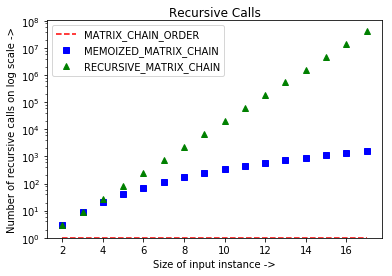

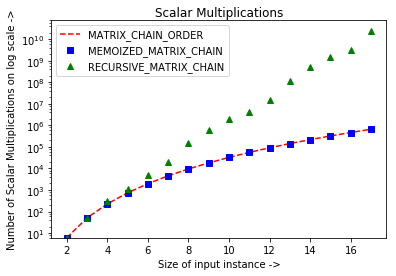

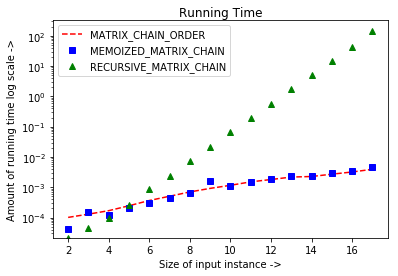

In [10]:
measures= ["rcc","smc","rt"]
titles=["Recursive Calls","Scalar Multiplications","Running Time"]
ylabels=["Number of recursive calls on log scale ->", "Number of Scalar Multiplications on log scale ->","Amount of running time log scale ->"]
spn=len(measures)*10+1
colors="rbg"
symbols=["--","s",'^']
an=["","MEMOIZED_MATRIX_CHAIN",""]
for i,measure in enumerate(measures):
    handles=[]
    plt.figure(i+1)
    plt.title(titles[i])
    plt.xlabel("Size of input instance ->")
    plt.ylabel(ylabels[i])
    plt.yscale("log")
    for j,av in enumerate(avs):
        handles.append(plt.plot(avs[av]["iiss"],avs[av]["measures"][measure],colors[j]+symbols[j], label=avs[av]["label"])[0])
    print handles
    plt.legend(handles=handles)
plt.show()